<a href="https://colab.research.google.com/github/xavierjacomep/Geohash_Spatial_Analysis/blob/main/Geohash_Instituciones_Educativas_Guayaquil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprovechando el Poder de Geohash para un Análisis Geoespacial Innovador y Práctico

Desarrollado por: [Xavier Jacome Piñeiros](https://www.linkedin.com/in/xavierjacomep/)

## Introducción

En este análisis, nos adentramos en el fascinante mundo de los datos geoespaciales, explorando el potencial de Geohash, un sistema público de geocodificación. Geohash simplifica y acelera las operaciones espaciales, como la clasificación y búsqueda, convirtiéndose en una herramienta invaluable para el análisis espacial. Utilizaremos un conjunto de datos que representan las coordenadas de las unidades educativas en Guayaquil, proporcionadas por el portal de datos geoespaciales de la Municipalidad.

### Instalar librerías requeridas

In [1]:
pip install python-geohash geopandas contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for python-geohash: filename=python_geohash-0.8.5-cp310-cp310-linux_x86_64.whl size=50876 sha256=8cf83211ba73463ddfbdf0b820b2afd70b78bb94bf811ac2dfcd536f471e4150
  Stored in directory: /root/.cache/pip/wheels/19/e8/74/3f800ffdbb57c27a3fee3a695c7009769356448837c1f4f899
Successfully built python-geohash


## Importando las Librerías

Las bibliotecas que importamos a continuación son esenciales para realizar el análisis geoespacial y visualizar los resultados. GeoPandas, por ejemplo, es crucial para trabajar con datos geoespaciales, mientras que Geohash nos ayuda a codificar la latitud y longitud en códigos de geohash.

In [2]:
import pandas as pd
import geopandas as gpd

import geohash
from shapely.geometry import Polygon

from tqdm import tqdm

import contextily as ctx
import matplotlib.pyplot as plt
import folium


## Cargando los Datos

In [4]:
coord_edu_gye = gpd.read_file(r'Equipamientos_Educativos.shp').to_crs('EPSG:4326')
coord_edu_gye.head()

,FID,OBJECTID_1,OBJECTID,Sostenimie,Jornada,Nivel,PARROQUIA,codigo,SECTOR_NOM,COOP_URB,DENOMINACI,CATEGORIA,SIM_B,USO,SCT_GYE,TIPOLOGIA,DIRECCION,geometry
0,1,501,0,Particular,Matutina,Inicial y Educación Básica,PASCUALES,NaN,NaN,COOP. LOS VERGELES - LÁMINA 7B,EDUMUNDO,ESCUELA BÁSICA,EES,Educación,S-31,Sectorial,3ER PASAJE 3 NE Y 3ER CALLEJÓN 24 NE,POINT (-79.90187 -2.08848)
1,2,1001,0,Particular,Matutina,Educación Básica y Bachillerato,TARQUI,NaN,NaN,NaN,BLAS PASCAL,ESCUELA COLEGIO,EES,Educación,S-44,NaN,NaN,POINT (-79.90093 -2.13462)
2,3,502,0,Particular,Matutina,Inicial y Educación Básica,PASCUALES,NaN,NaN,COOP. LOS VERGELES - LÁMINA 7B,MANUELA GARAYCOA DE CALDERON,ESCUELA BÁSICA,EES,Educación,S-31,Sectorial,8VO CALLEJÓN 24 NE Y 1ER PEATONAL 3 NE,POINT (-79.90386 -2.08573)
3,4,1002,0,Particular,Matutina,Inicial,TARQUI,NaN,NaN,NaN,NUESTRA MADRE DE LA MERCED,CENTRO EDUCATIVO INICIAL,EES,Educación,S-50,NaN,NaN,POINT (-79.87936 -2.14267)
4,5,1003,0,Particular,Matutina,Educación Básica y Bachillerato,TARQUI,NaN,NaN,NaN,DE LA ASUNCION,ESCUELA COLEGIO,EES,Educación,S-42,NaN,NaN,POINT (-79.93213 -2.14862)


### Extracción de Latitud y Longitud

Después de cargar los datos, extraemos la latitud y la longitud de los puntos de geometría. Estas coordenadas nos serán útiles más adelante para generar los códigos Geohash.



In [5]:
coord_edu_gye['LATITUD'] = coord_edu_gye['geometry'].y
coord_edu_gye['LONGITUD'] = coord_edu_gye['geometry'].x

### Generación de Códigos Geohash y Creación de Polígonos

Aquí, definimos dos funciones: **compute_geohash** para generar códigos de geohash a partir de la latitud y la longitud, y **create_polygon** para crear polígonos a partir de los códigos geohash. Aplicamos estas funciones a nuestro GeoDataFrame para obtener códigos de geohash y los polígonos correspondientes.

In [6]:
def compute_geohash(row):
    return geohash.encode(row["LATITUD"], row["LONGITUD"], precision=7)

def create_polygon(row):
    lat, lon, lat_err, lon_err = geohash.decode_exactly(row['GEOHASH_CODE'])
    polygon = Polygon([ (lon - lon_err, lat - lat_err),
                        (lon + lon_err, lat - lat_err),
                        (lon + lon_err, lat + lat_err),
                        (lon - lon_err, lat + lat_err) ])
    centroid = polygon.centroid
    return pd.Series({'GEOHASH':row['GEOHASH_CODE'],'geometry': polygon, 'LATITUD': centroid.y, 'LONGITUD': centroid.x})

In [7]:
coord_edu_gye["GEOHASH_CODE"] = coord_edu_gye.apply(compute_geohash, axis=1)
gdf_geohash = coord_edu_gye.apply(create_polygon, axis=1)


A continuación se exhiben los resultados de aplicar:
1. La función **compute_geohash** al dataframe *coord_edu_gye*, cuyo resultado se agregó como variable 'GEOHASH_CODE'.
2. La función **create_polygon** al dataframe *coord_edu_gye*, cuyo resultado se almacenó en el Geodataframe gdf_geohash.

In [8]:
display('Dataframe original incluyendo el Geohash correspondiente a la ubicación del establecimiento educativo')
display(coord_edu_gye.head())

display('GeoDataframe de polígonos Geohash relacionados a instituciones educativas')
display(gdf_geohash.head())

'Dataframe original incluyendo el Geohash correspondiente a la ubicación del establecimiento educativo'

,FID,OBJECTID_1,OBJECTID,Sostenimie,Jornada,Nivel,PARROQUIA,codigo,SECTOR_NOM,COOP_URB,...,CATEGORIA,SIM_B,USO,SCT_GYE,TIPOLOGIA,DIRECCION,geometry,LATITUD,LONGITUD,GEOHASH_CODE
0,1,501,0,Particular,Matutina,Inicial y Educación Básica,PASCUALES,NaN,NaN,COOP. LOS VERGELES - LÁMINA 7B,...,ESCUELA BÁSICA,EES,Educación,S-31,Sectorial,3ER PASAJE 3 NE Y 3ER CALLEJÓN 24 NE,POINT (-79.90187 -2.08848),-2.088483,-79.901873,6pxhjgc
1,2,1001,0,Particular,Matutina,Educación Básica y Bachillerato,TARQUI,NaN,NaN,NaN,...,ESCUELA COLEGIO,EES,Educación,S-44,NaN,NaN,POINT (-79.90093 -2.13462),-2.134620,-79.900930,6px5vg3
2,3,502,0,Particular,Matutina,Inicial y Educación Básica,PASCUALES,NaN,NaN,COOP. LOS VERGELES - LÁMINA 7B,...,ESCUELA BÁSICA,EES,Educación,S-31,Sectorial,8VO CALLEJÓN 24 NE Y 1ER PEATONAL 3 NE,POINT (-79.90386 -2.08573),-2.085731,-79.903857,6pxhjsr
3,4,1002,0,Particular,Matutina,Inicial,TARQUI,NaN,NaN,NaN,...,CENTRO EDUCATIVO INICIAL,EES,Educación,S-50,NaN,NaN,POINT (-79.87936 -2.14267),-2.142667,-79.879361,6px5y3c
4,5,1003,0,Particular,Matutina,Educación Básica y Bachillerato,TARQUI,NaN,NaN,NaN,...,ESCUELA COLEGIO,EES,Educación,S-42,NaN,NaN,POINT (-79.93213 -2.14862),-2.148619,-79.932126,6px5v0g


'GeoDataframe de polígonos Geohash relacionados a instituciones educativas'

,GEOHASH,geometry,LATITUD,LONGITUD
0,6pxhjgc,"POLYGON ((-79.90219 -2.08878, -79.90082 -2.088...",-2.088089,-79.901505
1,6px5vg3,"POLYGON ((-79.90219 -2.13547, -79.90082 -2.135...",-2.134781,-79.901505
2,6pxhjsr,"POLYGON ((-79.90494 -2.08603, -79.90356 -2.086...",-2.085342,-79.904251
3,6px5y3c,"POLYGON ((-79.88022 -2.14371, -79.87885 -2.143...",-2.143021,-79.879532
4,6px5v0g,"POLYGON ((-79.93240 -2.14920, -79.93103 -2.149...",-2.148514,-79.931717


### Visualización

Para visualizar mejor los resultados, transformamos el CRS a Web Mercator (EPSG:3857), trazamos el GeoDataFrame y añadimos un mapa base. Esto nos proporciona una visualización espacial de las unidades educativas en Guayaquil.

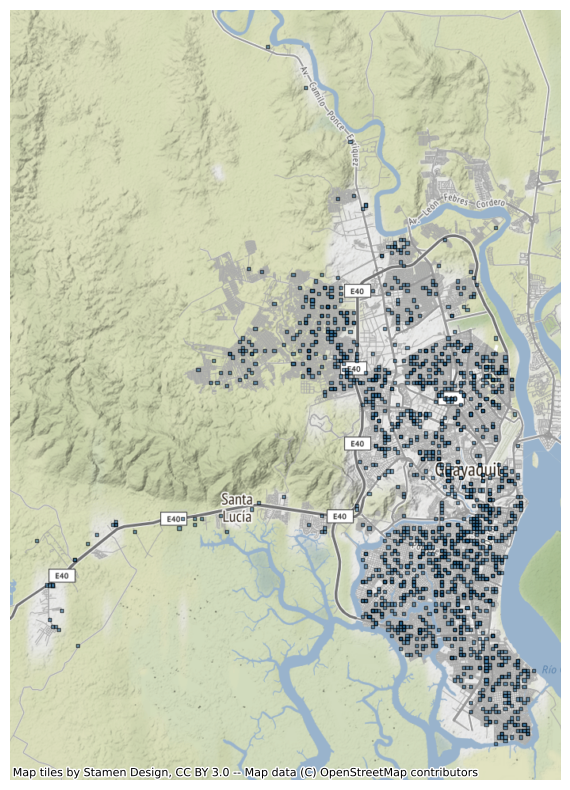

In [9]:
gdf_web_mercator = gdf_geohash.to_crs(epsg=3857)

ax = gdf_web_mercator.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)
ax.axis('off')
plt.show()

### Creación de un Mapa Interactivo

Para una exploración más detallada y personalizada, creamos un mapa interactivo utilizando la biblioteca Folium. Añadimos nuestros polígonos y marcadores para cada punto de nuestro GeoDataFrame.

In [10]:
m = folium.Map(location=[gdf_geohash['LATITUD'].mean(), gdf_geohash['LONGITUD'].mean()], zoom_start=13)

for _, row in gdf_geohash.iterrows():
    geojson = folium.GeoJson(data=row['geometry'].__geo_interface__)
    geojson.add_to(m)
    folium.Marker([row['LATITUD'], row['LONGITUD']]).add_to(m)

m

### Conclusión

Con este análisis, hemos demostrado cómo el sistema Geohash puede facilitar y optimizar el análisis espacial. Este enfoque puede extenderse a varios otros casos de uso que involucran datos geoespaciales. Aunque hemos arañado solo la superficie de lo que Geohash puede ofrecer, esperamos que este análisis inspire a otros a explorar más este valioso recurso. ¡Feliz exploración!